# 20 News Group Dataset

The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.

Supervised learning algorithms will require a category label for each document in the training set. In this case the category is the name of the newsgroup which also happens to be the name of the folder holding the individual documents.

#### List of the 20 newsgroups:

comp.graphics<br>
comp.os.ms-windows.misc<br>
comp.sys.ibm.pc.hardware<br>
comp.sys.mac.hardware<br>
comp.windows.x<br>
rec.autos<br>
rec.motorcycles<br>
rec.sport.baseball<br>
rec.sport.hockey<br>
sci.crypt<br>
sci.electronics<br>
sci.med<br>
sci.space<br>
misc.forsale<br>
talk.politics.misc<br>
talk.politics.guns<br>
talk.politics.mideast<br>
talk.religion.misc<br>
alt.atheism<br>
soc.religion.christian<br>

# Load the data 

In [7]:
# Load the training dataset - without headers, footers, quotes
from sklearn.datasets import fetch_20newsgroups
twenty_all = fetch_20newsgroups(subset='all')
twenty_train = fetch_20newsgroups(subset='train', remove=(['headers', 'footers', 'quotes']),shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', remove=(['headers', 'footers', 'quotes']),shuffle=True, random_state=42)

In [8]:
print("Number of total articles: " + str(len(twenty_all.data)))
print("Number of training articles: " + str(len(twenty_train.data)))
print("Number of testing articles: " + str(len(twenty_test.data)))
print("Number of diffrent categories: " + str(len(twenty_all.target_names)))

# Print the news group (target) names 
twenty_all.target_names

Number of total articles: 18846
Number of training articles: 11314
Number of testing articles: 7532
Number of diffrent categories: 20


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
# Print the first file
print(twenty_train.data[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [16]:
# Print the target id and target names for the first 10 files.
for t in twenty_train.target[:10]:
    print(twenty_train.target[t], twenty_train.target_names[t])

3 rec.autos
14 comp.sys.mac.hardware
14 comp.sys.mac.hardware
4 comp.graphics
6 sci.space
1 talk.politics.guns
14 sci.med
1 comp.sys.ibm.pc.hardware
4 comp.os.ms-windows.misc
14 comp.sys.mac.hardware


In [8]:
# Print the text and the class to see what it looks like 
for t in range(1):
    print("TEXT:",twenty_train.data[t],'\n')
    print("CLASS:",twenty_train.target[t], '\n')

TEXT: I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail. 

CLASS: 7 



# Extract features from the text files

In [30]:
# Transform text into feature vectors
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words=stopwords.words('english'))

# Feature vectorization on the training, validation, and test sets
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_test_counts = count_vect.transform(twenty_test.data)

In [31]:
print(X_train_counts)

  (0, 59148)	1
  (0, 71758)	1
  (0, 57326)	1
  (0, 41939)	1
  (0, 49873)	1
  (0, 96267)	1
  (0, 46758)	1
  (0, 59011)	1
  (0, 73281)	1
  (0, 99772)	1
  (0, 84176)	1
  (0, 37250)	1
  (0, 64857)	1
  (0, 62677)	1
  (0, 88042)	1
  (0, 54566)	1
  (0, 23458)	1
  (0, 77785)	1
  (0, 81564)	1
  (0, 24612)	1
  (0, 41684)	1
  (0, 16807)	1
  (0, 83328)	1
  (0, 76378)	1
  (0, 34776)	1
  :	:
  (11313, 26179)	1
  (11313, 61906)	1
  (11313, 84505)	1
  (11313, 87629)	1
  (11313, 71900)	1
  (11313, 62017)	1
  (11313, 21243)	1
  (11313, 69974)	1
  (11313, 85424)	1
  (11313, 82562)	1
  (11313, 23280)	1
  (11313, 89687)	1
  (11313, 96365)	1
  (11313, 81648)	1
  (11313, 81698)	1
  (11313, 40349)	1
  (11313, 47153)	1
  (11313, 25450)	1
  (11313, 90527)	1
  (11313, 6044)	2
  (11313, 44707)	1
  (11313, 46222)	1
  (11313, 2777)	1
  (11313, 66778)	2
  (11313, 37250)	1


In [32]:
# Reweigh feature vectors to take into account frequencies of occurence 
# e.g word "the", "a", etc... occur very frequently but don't give information about the content
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

# Term frequencies transformer on the training, validation, and test sets
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


In [33]:
print(X_train_tfidf)

  (0, 99772)	0.09004397895882787
  (0, 97043)	0.13101150564490632
  (0, 96267)	0.11816124593471743
  (0, 88042)	0.24673962733154134
  (0, 84438)	0.15648793312914358
  (0, 84176)	0.15611429964161938
  (0, 83328)	0.10840895338165643
  (0, 81564)	0.13970658065976593
  (0, 80529)	0.1214827380004017
  (0, 77785)	0.11660965335332406
  (0, 76378)	0.08583549743356249
  (0, 73281)	0.15432381874730713
  (0, 71758)	0.08382174901415619
  (0, 64857)	0.10211792854034786
  (0, 62677)	0.12464139975164241
  (0, 59148)	0.09602298648309876
  (0, 59011)	0.0925479206487017
  (0, 57326)	0.10167203852809496
  (0, 57323)	0.12926429346647386
  (0, 55680)	0.13214917913412993
  (0, 54566)	0.06655929424587632
  (0, 49873)	0.11348098258333818
  (0, 46758)	0.11954501208295873
  (0, 41939)	0.21467711428119496
  (0, 41684)	0.12442542007879723
  :	:
  (11313, 81698)	0.15207853359525125
  (11313, 81648)	0.1360201751025253
  (11313, 78272)	0.18095148258930271
  (11313, 71900)	0.1587621625666992
  (11313, 71694)	0.168986

# Build a Pipeline 

The pipeline will do feature vectorization, ifidf transformation, and model fitting, and grid search CV for different hyper parameters. 

### Train different classifier models with pipeline
1. Logistic Regression
2. Decision Trees
3. Support Vector Machines
4. Ada Boost 
5. Random Forest

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from sklearn import metrics
import string
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

# stop_words=stopwords.words('english')+ list(string.punctuation))
pipeline = Pipeline([ 
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])

params = {'clf__tol': [1e-1, 1e-2, 1e-3, 1e-4],
         'clf__penalty': ['l2','none'],
         'clf__max_iter': [5000 , 10000]}

grid_search = GridSearchCV(pipeline, param_grid=params, cv=5)

grid_search.fit(twenty_train.data, twenty_train.target)

scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

print('scores:',scores)
print('scores_std',scores_std)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

scores: [0.72520804 0.72485453 0.72485453 0.72485453 0.72998074 0.72388217
 0.72370522 0.72370522 0.72520804 0.72485453 0.72485453 0.72485453
 0.72998074 0.72388217 0.72370522 0.72370522]
scores_std [0.00578891 0.00536149 0.00536149 0.00536149 0.00804043 0.00718843
 0.00905963 0.00905963 0.00578891 0.00536149 0.00536149 0.00536149
 0.00804043 0.00718843 0.00905963 0.00905963]
Best score: 0.730
Best parameters set:
	clf__max_iter: 5000
	clf__penalty: 'none'
	clf__tol: 0.1


In [91]:
from sklearn.linear_model import LogisticRegression

# Try removing stopwords
pipeline = Pipeline([ 
    ('vectorizer', CountVectorizer(stop_words=stopwords.words('english')+ list(string.punctuation))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])

params = {'clf__tol': [1e-1, 1e-2, 1e-3, 1e-4],
         'clf__penalty': ['l2','none'],
         'clf__max_iter': [5000 , 10000]}

grid_search = GridSearchCV(pipeline, param_grid=params, cv=5)

grid_search.fit(twenty_train.data, twenty_train.target)

scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

print('scores:',scores)
print('scores_std',scores_std)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

scores: [0.74368101 0.74376947 0.74376947 0.74376947 0.74085221 0.74226723
 0.73988129 0.73731833 0.74368101 0.74376947 0.74376947 0.74376947
 0.74085221 0.74226723 0.73988129 0.73731833]
scores_std [0.0072018  0.00753034 0.00753034 0.00753034 0.00719887 0.01311747
 0.01863134 0.02322823 0.0072018  0.00753034 0.00753034 0.00753034
 0.00719887 0.01311747 0.01863134 0.02322823]
Best score: 0.744
Best parameters set:
	clf__max_iter: 5000
	clf__penalty: 'l2'
	clf__tol: 0.01


Predicted:  [ 7  1 19 ...  9 12 15]
Actual:  [ 7  5  0 ...  9  6 15]
Accuracy:  68.8794476898566 %


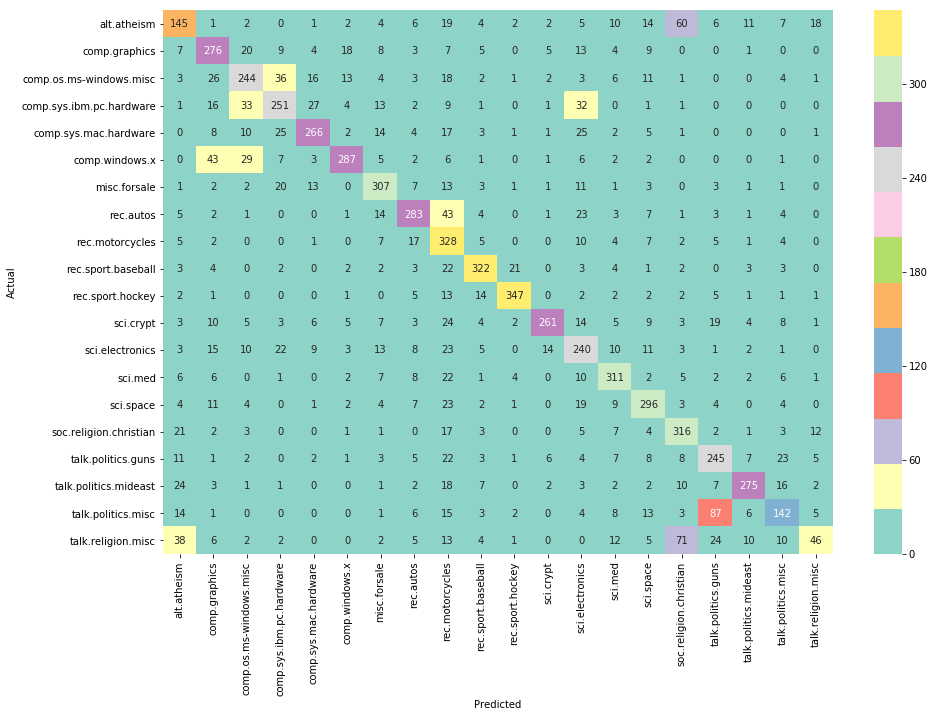

In [95]:
# Run pipeline with best params
pipeline = Pipeline([ 
    ('vectorizer', CountVectorizer(stop_words=stopwords.words('english')+ list(string.punctuation))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(penalty = 'l2', max_iter = 5000, tol = 0.01)),
])

pipeline.fit(twenty_train.data, twenty_train.target)
y_pred = pipeline.predict(twenty_test.data)

print("Predicted: ", y_pred)
print("Actual: ", twenty_test.target)
print("Accuracy: ", metrics.accuracy_score(twenty_test.target, y_pred)*100, "%")

# Plot confusion_matrix
conf_mat = confusion_matrix(twenty_test.target, y_pred)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
xticklabels=twenty_train.target_names, yticklabels=twenty_train.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Decision Trees

In [79]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([ 
    ('vectorizer', CountVectorizer(stop_words=stopwords.words('english')+ list(string.punctuation))),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier())
])

#criterion parameter:The function to measure the quality of a split.
#max_depth parameter:The maximum depth of the tree. 
#max_features parameter:The number of features to consider when looking for the best split. If “sqrt”, then max_features=sqrt(n_features). If “log2”, then max_features=log2(n_features).
params = {'clf__criterion': ['gini', 'entropy'],
             'clf__max_depth': [None, 5, 10, 20, 50],
             'clf__max_features': ['sqrt', 'log2', None]}

grid_search = GridSearchCV(pipeline, param_grid=params, cv=5)

grid_search.fit(twenty_train.data, twenty_train.target)

scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

print('scores:',scores)
print('scores_std',scores_std)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

scores: [0.35814184 0.22343958 0.47207016 0.07503959 0.06266523 0.14813556
 0.09094885 0.06452144 0.22459018 0.14495273 0.07123948 0.2932652
 0.21512983 0.090949   0.37917645 0.23660767 0.20090285 0.35699194
 0.08352648 0.05815786 0.15759231 0.09837383 0.06319628 0.22989295
 0.14168277 0.07132723 0.29795081 0.19603892 0.09404326 0.34267361]
scores_std [0.01026007 0.00579063 0.00550711 0.00480872 0.00617808 0.00290949
 0.01007075 0.00501814 0.0075226  0.01448828 0.00212815 0.0048907
 0.01362327 0.00500571 0.00896491 0.011436   0.01629093 0.0091717
 0.01146635 0.00220668 0.0043148  0.00688525 0.00357246 0.00623145
 0.00778653 0.00256196 0.0116087  0.00955218 0.00723741 0.00888586]
Best score: 0.472
Best parameters set:
	clf__criterion: 'gini'
	clf__max_depth: None
	clf__max_features: None


Predicted:  [18 10  7 ... 18 14 19]
Actual:  [ 7  5  0 ...  9  6 15]
Accuracy:  43.53425385023898 %


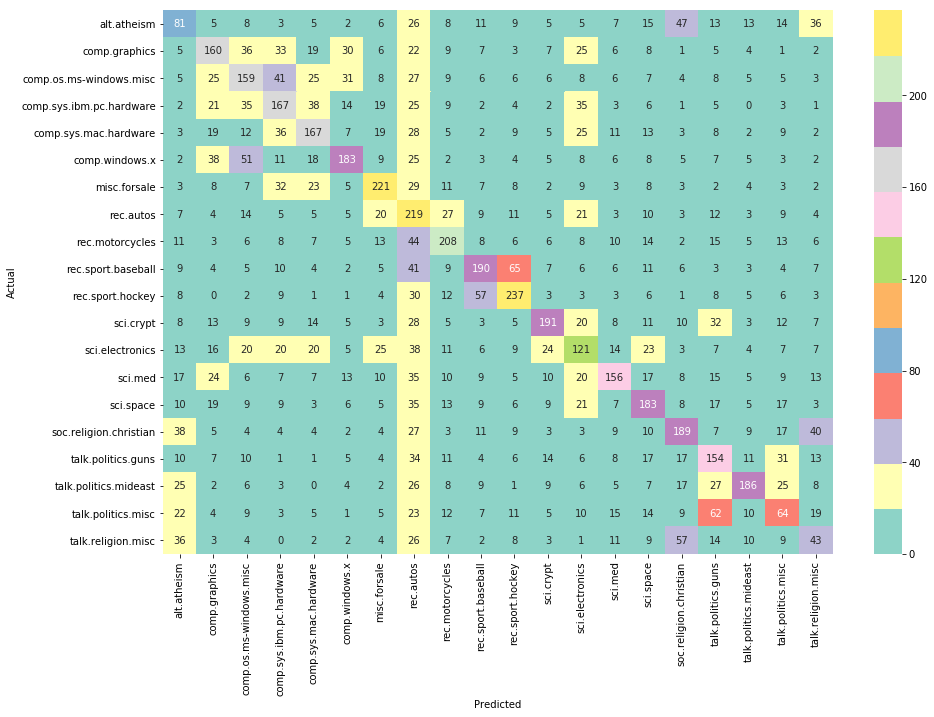

In [96]:
# Run pipeline with best params
pipeline = Pipeline([ 
    ('vectorizer', CountVectorizer(stop_words=stopwords.words('english')+ list(string.punctuation))),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier(criterion = 'gini', max_depth = None, max_features = None)),
])

pipeline.fit(twenty_train.data, twenty_train.target)
y_pred = pipeline.predict(twenty_test.data)

print("Predicted: ", y_pred)
print("Actual: ", twenty_test.target)
print("Accuracy: ", metrics.accuracy_score(twenty_test.target, y_pred)*100, "%")

# Plot confusion_matrix
conf_mat = confusion_matrix(twenty_test.target, y_pred)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
xticklabels=twenty_train.target_names, yticklabels=twenty_train.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Support Vector Machines

In [80]:
from sklearn.svm import LinearSVC

pipeline = Pipeline([ 
    ('vectorizer', CountVectorizer(stop_words=stopwords.words('english')+ list(string.punctuation))),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

#penalty parameter:Specifies the norm used in the penalization
#tol parameter:Tolerance for stopping criteria.
#C parameter: Regularization parameter. The strength of the regularization is inversely proportional to C.
#max_iter parameter:The maximum number of iterations to be run
params = {'clf__penalty': ['l2'],
             'clf__tol': [1e-1, 1e-2, 1e-3, 1e-4],
              'clf__C': [1.0, 0.5],
             'clf__max_iter': [1000, 2000, 3000]}

grid_search = GridSearchCV(pipeline, param_grid=params, cv=5)

grid_search.fit(twenty_train.data, twenty_train.target)

scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

print('scores:',scores)
print('scores_std',scores_std)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

scores: [0.76374483 0.76374479 0.76383317 0.76383317 0.76339136 0.76374479
 0.76383317 0.76374479 0.7634797  0.76374479 0.76374479 0.76383317
 0.76630819 0.76621981 0.76621981 0.76621981 0.76613144 0.76621981
 0.76621981 0.76621981 0.7658663  0.76613144 0.76621981 0.76621981]
scores_std [0.00719586 0.00716986 0.00720271 0.00720271 0.00748632 0.00735803
 0.00720271 0.00735803 0.00725888 0.00735803 0.00735803 0.00720271
 0.0075038  0.00796116 0.00796116 0.00796116 0.0075707  0.00796116
 0.00796116 0.00796116 0.00784365 0.0081087  0.00796116 0.00796116]
Best score: 0.766
Best parameters set:
	clf__C: 0.5
	clf__max_iter: 1000
	clf__penalty: 'l2'
	clf__tol: 0.1


Predicted:  [ 4  1  2 ...  9 12 15]
Actual:  [ 7  5  0 ...  9  6 15]
Accuracy:  70.02124269782263 %


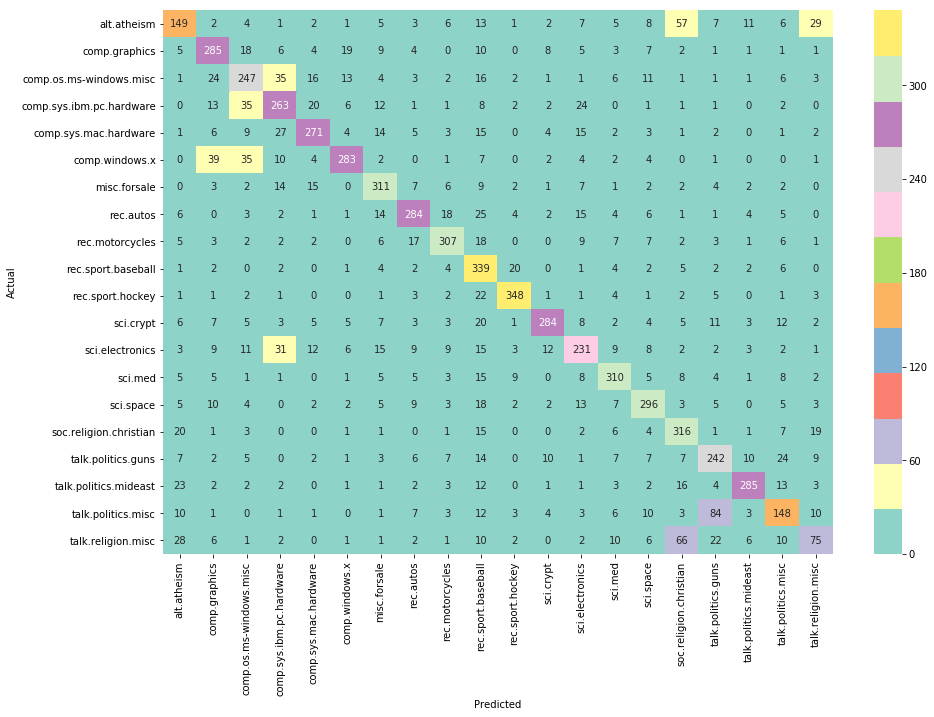

In [99]:
# Run pipeline with best params
pipeline = Pipeline([ 
    ('vectorizer', CountVectorizer(stop_words=stopwords.words('english')+ list(string.punctuation))),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC(C = 0.5, max_iter = 1000, penalty = 'l2', tol = 0.1)),
])

pipeline.fit(twenty_train.data, twenty_train.target)
y_pred = pipeline.predict(twenty_test.data)

print("Predicted: ", y_pred)
print("Actual: ", twenty_test.target)
print("Accuracy: ", metrics.accuracy_score(twenty_test.target, y_pred)*100, "%")

# Plot confusion_matrix
conf_mat = confusion_matrix(twenty_test.target, y_pred)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
xticklabels=twenty_train.target_names, yticklabels=twenty_train.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Adaboost

In [17]:
from sklearn.ensemble import AdaBoostClassifier

pipeline = Pipeline([ 
    ('vectorizer', CountVectorizer(stop_words=stopwords.words('english')+ list(string.punctuation))),
    ('tfidf', TfidfTransformer()),
    ('clf', AdaBoostClassifier())
])

#base_estimator parameter: The base estimator from which the boosted ensemble is built.
#n_estimators: The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
#learning_rate:Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.
params = {'clf__base_estimator': [None],
              'clf__n_estimators': [25, 50, 100],
             'clf__learning_rate': [0.1, 0.5, 1]}

grid_search = GridSearchCV(pipeline, param_grid=params, cv=5)

grid_search.fit(twenty_train.data, twenty_train.target)

scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

print('scores:',scores)
print('scores_std',scores_std)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

scores: [0.28345396 0.32517339 0.3753756  0.31739532 0.39535061 0.46376187
 0.31757204 0.40259813 0.45633755]
scores_std [0.00504138 0.01155111 0.00513911 0.00839942 0.00924675 0.00775699
 0.00779525 0.00780879 0.00775327]
Best score: 0.464
Best parameters set:
	clf__base_estimator: None
	clf__learning_rate: 0.5
	clf__n_estimators: 100


Predicted:  [ 7  1 13 ...  9 12 17]
Actual:  [ 7  5  0 ...  9  6 15]
Accuracy:  45.65852363250133 %


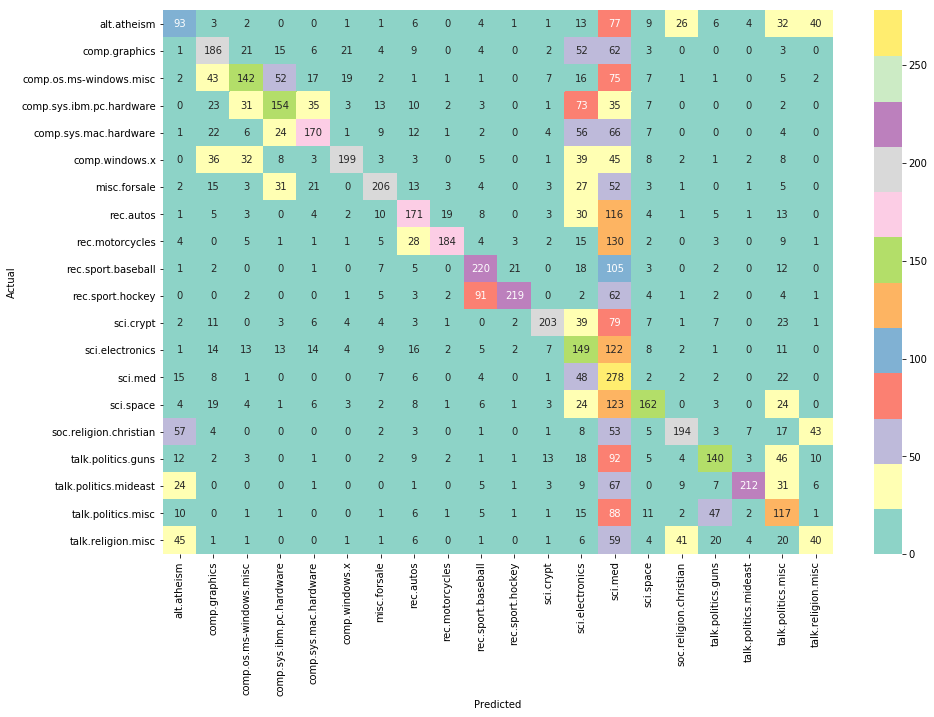

In [28]:
# Run pipeline with best params
pipeline = Pipeline([ 
    ('vectorizer', CountVectorizer(stop_words=stopwords.words('english')+ list(string.punctuation))),
    ('tfidf', TfidfTransformer()),
    ('clf', AdaBoostClassifier(base_estimator = None, n_estimators = 200, learning_rate = 0.5)),
])

pipeline.fit(twenty_train.data, twenty_train.target)
y_pred = pipeline.predict(twenty_test.data)

print("Predicted: ", y_pred)
print("Actual: ", twenty_test.target)
print("Accuracy: ", metrics.accuracy_score(twenty_test.target, y_pred)*100, "%")

# Plot confusion_matrix
conf_mat = confusion_matrix(twenty_test.target, y_pred)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
xticklabels=twenty_train.target_names, yticklabels=twenty_train.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([ 
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier())
])

#n_estimators parameter:The number of trees in the forest
#criterion parameter:The function to measure the quality of a split (gini or entropy)
#max_depth parameter:The maximum depth of the tree.
#max_features parameter:The number of features to consider when looking for the best split. If “sqrt”, then max_features=sqrt(n_features) (same as “auto”). If “log2”, then max_features=log2(n_features). If None, then max_features=n_features.
#bootstrap parameter: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.
params = {'clf__n_estimators': [40, 60],
         'clf__criterion': ['gini', 'entropy'],
         'clf__max_depth': [None, 10, 20],
         'clf__max_features': ['sqrt', 'log2', None],
         'clf__bootstrap': [True, False]}

grid_search = GridSearchCV(pipeline, param_grid=params, cv=5)

grid_search.fit(twenty_train.data, twenty_train.target)

scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

print('scores:',scores)
print('scores_std',scores_std)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

scores: [0.59333647 0.61578622 0.5284601  0.57663001 0.55356168 0.56407959
 0.48373676 0.52138953 0.24730651 0.29865713 0.2772678  0.28716695
 0.53809353 0.56187084 0.32393308 0.37166355 0.36423951 0.36123484
 0.42434169 0.46959405 0.46305312 0.51272811 0.38615931 0.3963239
 0.43105898 0.47560608 0.23537264 0.2922054  0.31704278 0.3127108
 0.45872481 0.4913376  0.30820343 0.35875857 0.37758615 0.38271217
 0.61790617 0.63735126 0.55250157 0.6040307  0.45483582 0.45607339
 0.49045245 0.53358624 0.271169   0.32110877 0.21999419 0.22017099
 0.55444581 0.58113812 0.34903567 0.40984456 0.29317675 0.29300003
 0.47949406 0.50707081 0.49611085 0.54304424 0.30272277 0.29936451
 0.4519184  0.48621135 0.25914811 0.30758432 0.22547369 0.22573882
 0.49982238 0.52943121 0.33577929 0.38500914 0.28787428 0.28690228]
scores_std [0.00780248 0.00527285 0.00818852 0.00588788 0.00731214 0.01035956
 0.00185377 0.00863514 0.0177475  0.00434836 0.00562888 0.00649387
 0.01287041 0.00941977 0.01193107 0.01124238

Predicted:  [ 4  6  0 ...  9  6 15]
Actual:  [ 7  5  0 ...  9  6 15]
Accuracy:  61.72331386086033 %


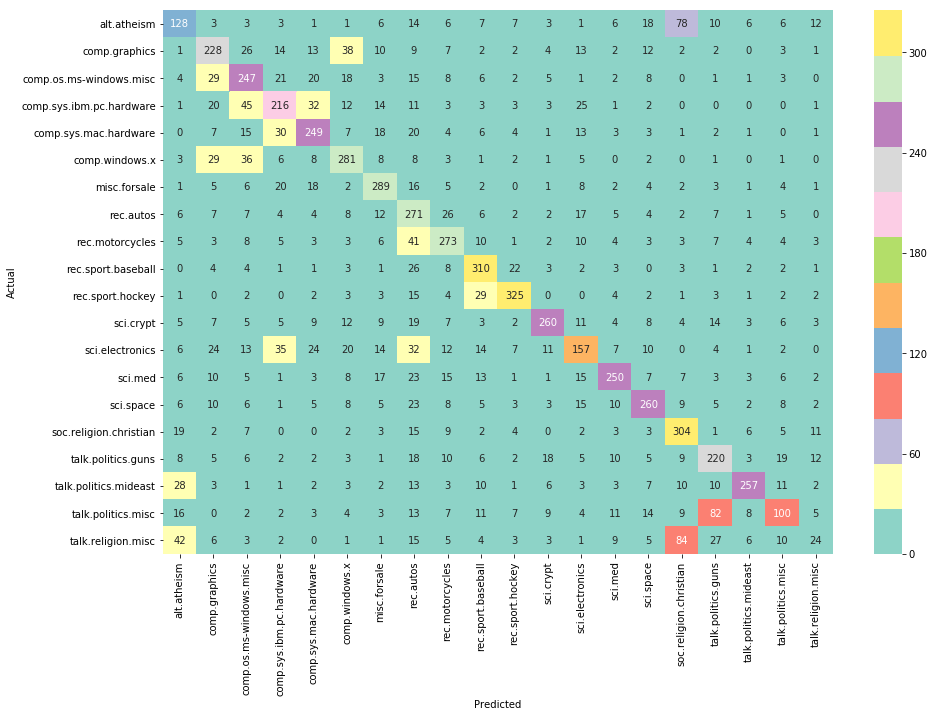

In [101]:
# Run pipeline with best params
pipeline = Pipeline([ 
    ('vectorizer', CountVectorizer(stop_words=stopwords.words('english')+ list(string.punctuation))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators = 60, criterion = 'gini', max_depth = None, max_features = 'sqrt', bootstrap = False)),
])

pipeline.fit(twenty_train.data, twenty_train.target)
y_pred = pipeline.predict(twenty_test.data)

print("Predicted: ", y_pred)
print("Actual: ", twenty_test.target)
print("Accuracy: ", metrics.accuracy_score(twenty_test.target, y_pred)*100, "%")

# Plot confusion_matrix
conf_mat = confusion_matrix(twenty_test.target, y_pred)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
xticklabels=twenty_train.target_names, yticklabels=twenty_train.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Compare performance of all the classifiers with their best hyperparams


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    LogisticRegression(penalty = 'l2', max_iter = 5000, tol = 0.01),
    LinearSVC(C = 0.5, max_iter = 1000, penalty = 'l2', tol = 0.1),
    DecisionTreeClassifier(criterion = 'gini', max_depth = None, max_features = None),
    RandomForestClassifier(n_estimators = 60, criterion = 'gini', max_depth = None, max_features = 'sqrt', bootstrap = False),
    AdaBoostClassifier(base_estimator = None, n_estimators = 200, learning_rate = 0.5),
    ]

for classifier in classifiers:
    pipeline = Pipeline([
    ('vectorizer', CountVectorizer(stop_words=stopwords.words('english')+ list(string.punctuation))),
    ('tfidf', TfidfTransformer()),
    ('clf', classifier)
    ])
    
    pipeline.fit(twenty_train.data, twenty_train.target)

    y_pred = pipeline.predict(twenty_test.data)
    
    print(classifier)
    print("Accuracy: ", metrics.accuracy_score(twenty_test.target, y_pred)*100, "%")
    print("Recall: ", metrics.recall_score(twenty_test.target, y_pred,average="macro")*100, "%")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False)
Accuracy:  68.8794476898566 %
Recall:  67.47004710332271 %
LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.1,
          verbose=0)
Accuracy:  69.94158258098778 %
Recall:  68.72774911997355 %
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fr